#### Importing Libraries

In [102]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import os as os
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and Preview Dataset

In [103]:
# Load the dataset 
df = pd.read_csv('../../data/benin.csv', encoding='latin1', parse_dates=['Timestamp'])
# Optional: Display the first few rows
df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_10192\461508027.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/benin.csv', encoding='latin1', parse_dates=['Timestamp'])
C:\Users\pc\AppData\Local\Temp\ipykernel_10192\461508027.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../../data/benin.csv', encoding='latin1', parse_dates=['Timestamp'])


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0,0,26.2,93.4,0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0,0,26.2,93.6,0,0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0,0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1,0,0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN


####  Convert Timestamp and Clean Column Types

In [104]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
# Convert all other columns (except Timestamp and Comments) to numeric
for col in df.columns:
    if col not in ['Timestamp', 'Comments']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

C:\Users\pc\AppData\Local\Temp\ipykernel_10192\3908643666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  float64       
 14  Cleaning       525600 non-null  float64       
 15  

#### Summary Stats & Missing Value Report

In [105]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

# Missing value report
missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]
print("\nMissing Values:")
print(missing_report)

# Columns with >5% missing
threshold = 0.05 * len(df)
print("\nColumns with >5% Missing:")
print(missing_report[missing_report > threshold])

Summary Statistics:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:29.999999232,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN



Missing Values:
Timestamp             1
GHI                   1
DNI                   1
DHI                   1
ModA                  1
ModB                  1
Tamb                  1
RH                    1
WS                    1
WSgust                1
WSstdev               1
WD                    1
WDstdev               1
BP                    1
Cleaning              1
Precipitation         1
TModA                 1
TModB                 1
Comments         525601
dtype: int64

Columns with >5% Missing:
Comments    525601
dtype: int64


#### Outlier Detection with Z-Scores

In [106]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate z-scores
z_scores = df[key_columns].apply(zscore)

# Flag outliers
outliers = (np.abs(z_scores) > 3)
print(f"Outliers detected:\n{outliers.sum()}")
df['cleaned_flag'] = ~outliers.any(axis=1)  # True = clean row


Outliers detected:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


#### Handle Missing Values & Export Cleaned Dataset

In [107]:
# Impute missing values in key columns with median
for col in key_columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Optional: drop non-essential columns with too many nulls (manual decision if needed)

# Export cleaned data
df_clean = df[df['cleaned_flag']].copy()
df_clean.to_csv('../../data/benin_clean.csv', index=False)

print("Cleaned data exported to: ../../data/benin_clean.csv")

Cleaned data exported to: ../../data/benin_clean.csv


#### Monthly Trends of Solar Irradiance & Temperature

C:\Users\pc\AppData\Local\Temp\ipykernel_10192\1032880048.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


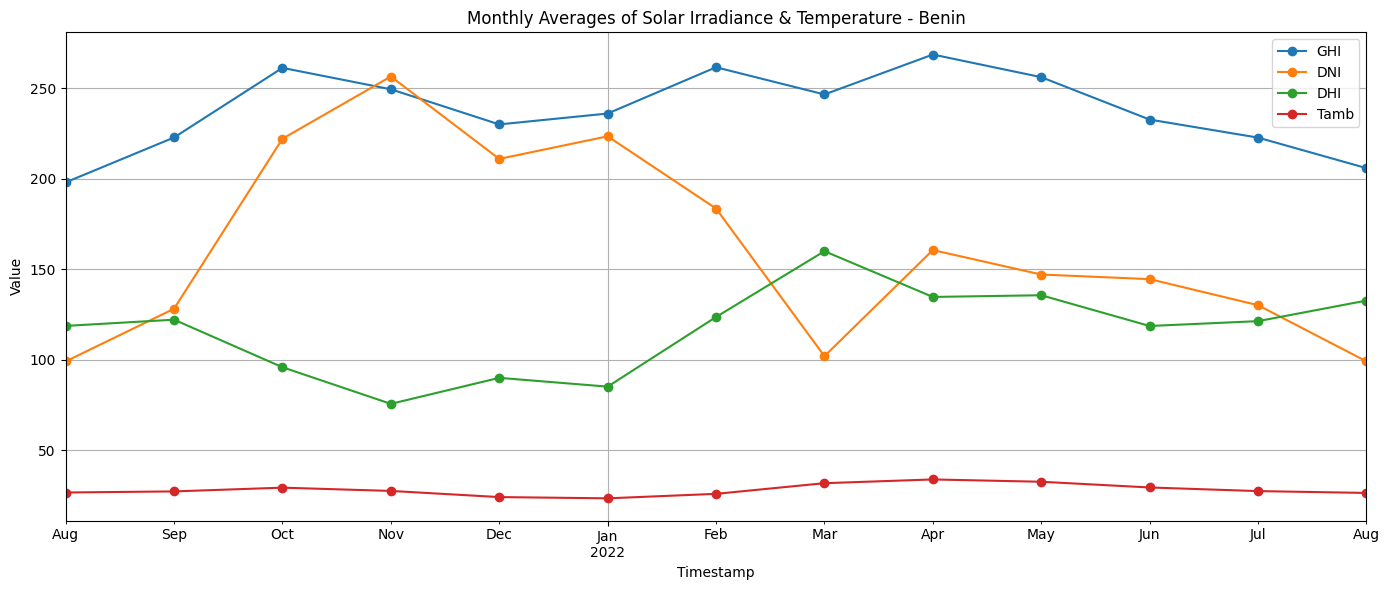

In [108]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Resample monthly averages
monthly_avg = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

# Plot
monthly_avg.plot(figsize=(14, 6), marker='o')
plt.title("Monthly Averages of Solar Irradiance & Temperature - Benin")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Impact of Cleaning on ModA and ModB Values

C:\Users\pc\AppData\Local\Temp\ipykernel_10192\2291953916.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_full = pd.read_csv('../../data/benin.csv', parse_dates=['Timestamp'], encoding='latin1', low_memory=False)
C:\Users\pc\AppData\Local\Temp\ipykernel_10192\2291953916.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full[col].fillna(median_val, inplace=True)
C:\Users\pc\App

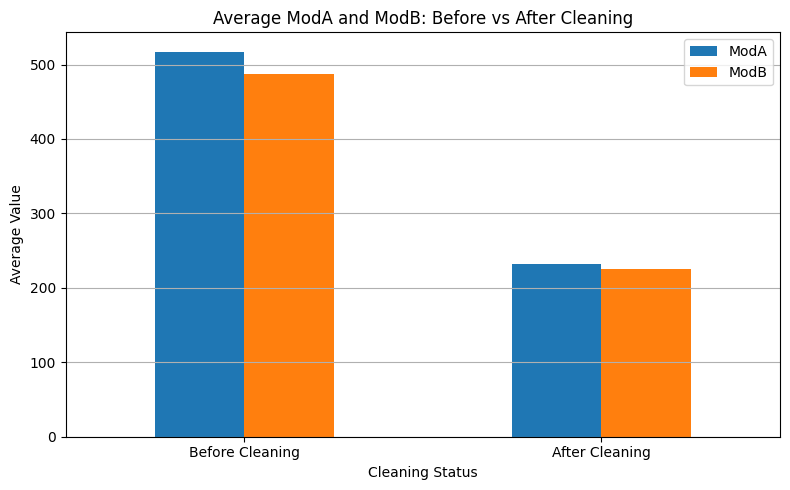

In [109]:
# Load full original data again to compare pre-cleaning
df_full = pd.read_csv('../../data/benin.csv', parse_dates=['Timestamp'], encoding='latin1', low_memory=False)

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Convert key columns to numeric, coercing errors to NaN
for col in key_columns:
    df_full[col] = pd.to_numeric(df_full[col], errors='coerce')

# Fill NaNs in key columns with median (or drop rows with NaN if preferred)
for col in key_columns:
    median_val = df_full[col].median()
    df_full[col].fillna(median_val, inplace=True)

# Compute z-scores on the cleaned numeric data
z_scores_full = df_full[key_columns].apply(zscore)

# Flag rows where any |z-score| > 3 as outliers (False = outlier, True = clean)
df_full['cleaned_flag'] = ~z_scores_full.abs().gt(3).any(axis=1)

# Group by cleaning flag and compute mean of ModA and ModB
impact_avg = df_full.groupby('cleaned_flag')[['ModA', 'ModB']].mean()
impact_avg.index = ['Before Cleaning', 'After Cleaning']

# Plot the comparison
impact_avg.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Average ModA and ModB: Before vs After Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Correlation Heatmap & Scatter Plots for Key Variables

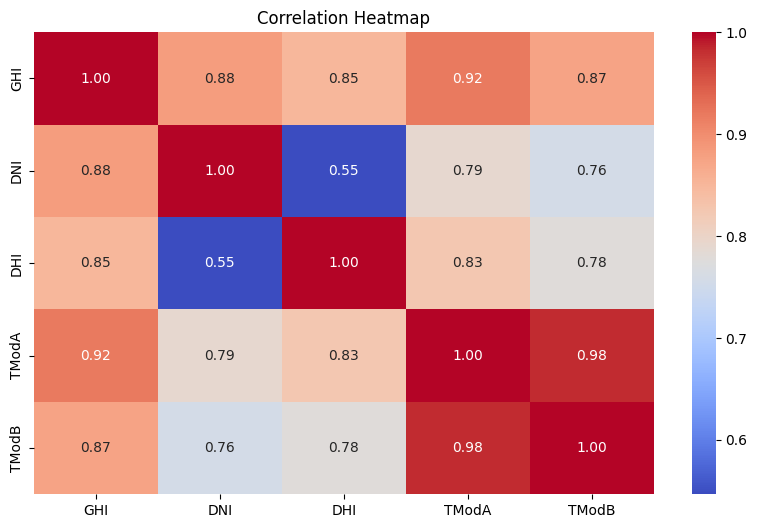

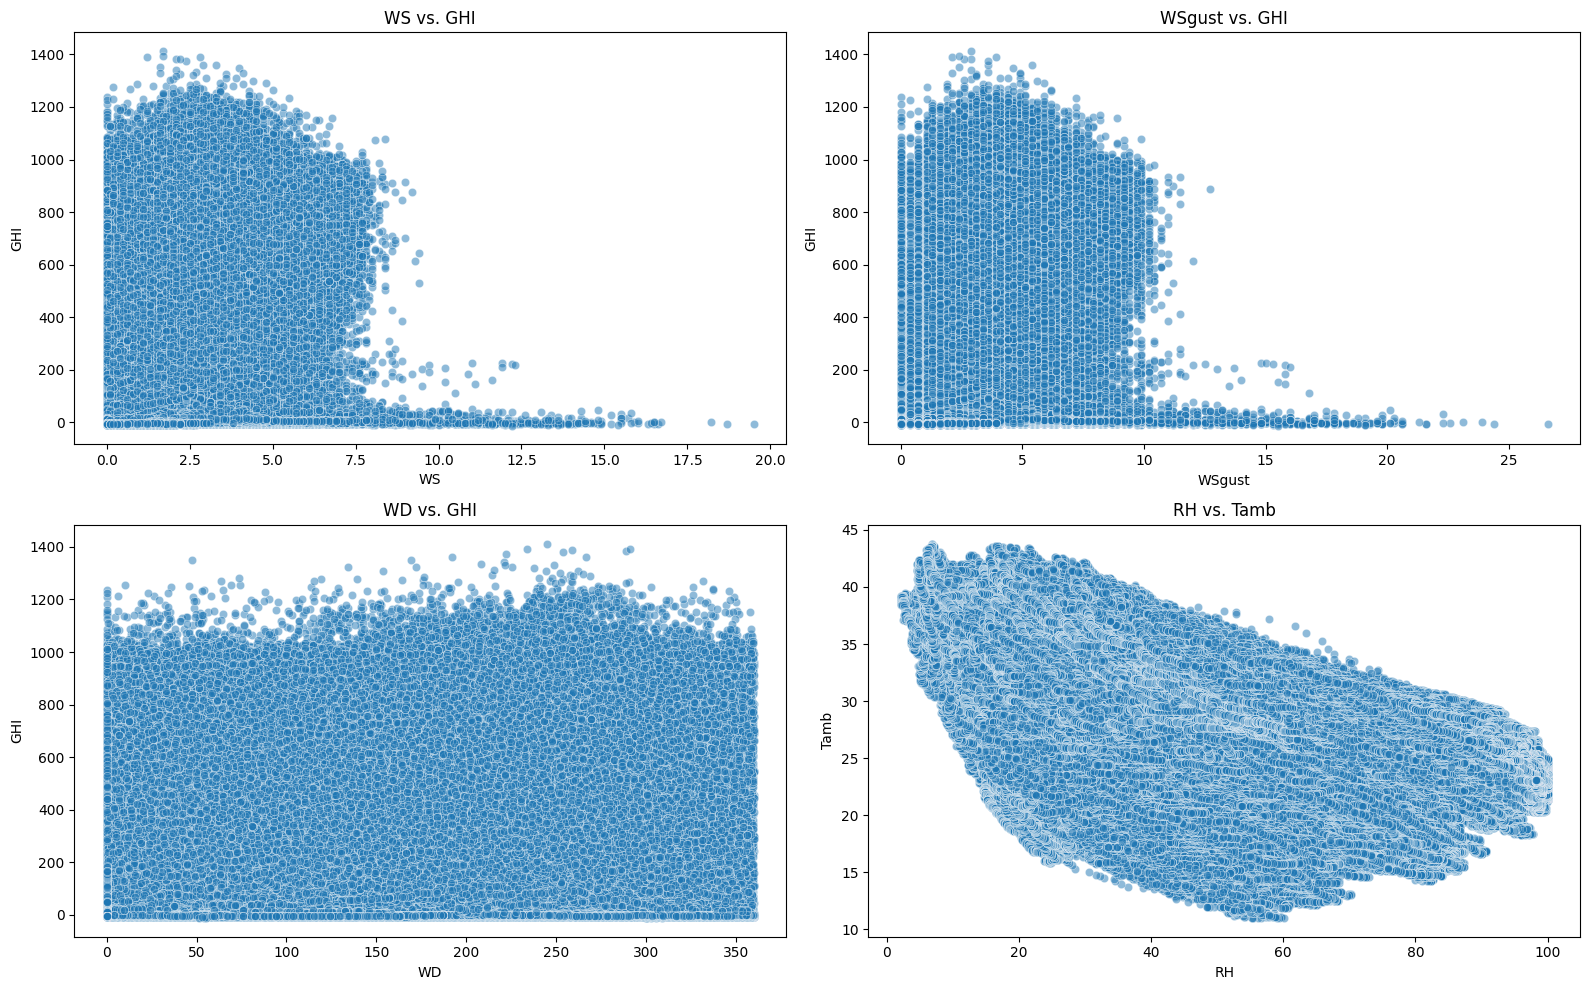

In [110]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
plt.figure(figsize=(16, 10))
for i, col in enumerate(['WS', 'WSgust', 'WD']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df_clean, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Tamb')
plt.tight_layout()
plt.show()


#### Distribution Analysis & Wind Rose Visualization

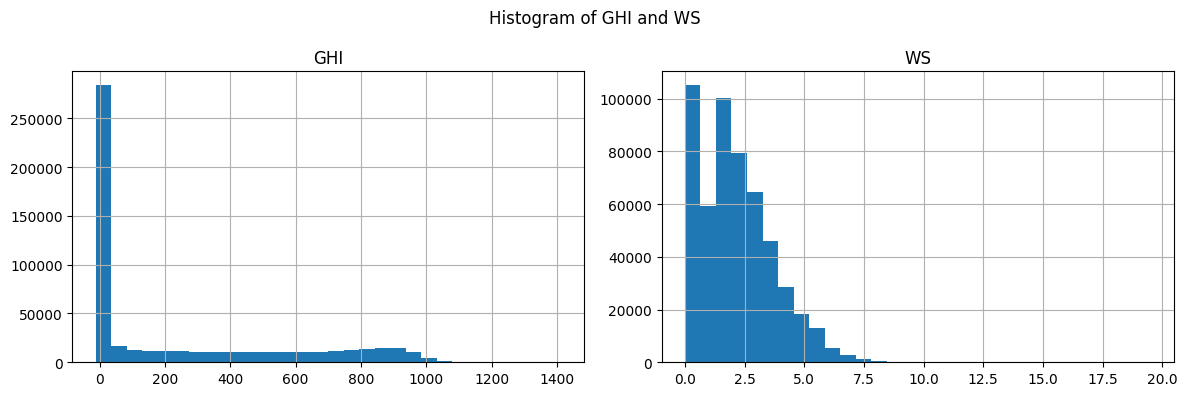

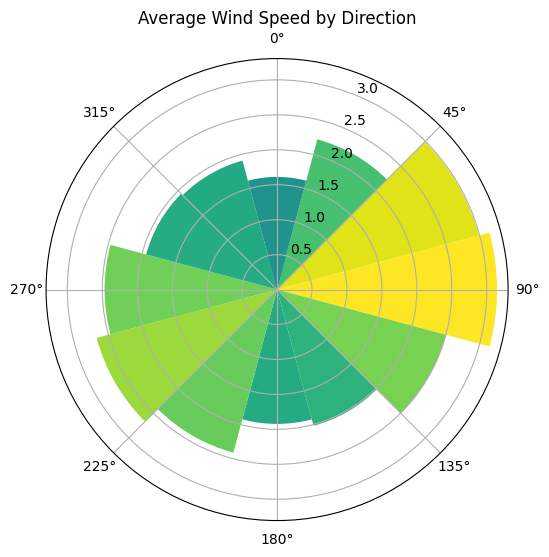

In [111]:
# Histograms
df_clean[['GHI', 'WS']].hist(bins=30, figsize=(12, 4), layout=(1, 2))
plt.suptitle("Histogram of GHI and WS")
plt.tight_layout()
plt.show()

# Wind rose (simplified radial plot)
import matplotlib.cm as cm
df_clean['WD_bin'] = (df_clean['WD'] // 30) * 30  # binning directions

wind_rose = df_clean.groupby('WD_bin')['WS'].mean()
angles = np.deg2rad(wind_rose.index)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(angles, wind_rose.values, width=np.deg2rad(30), bottom=0.0, color=cm.viridis(wind_rose.values / max(wind_rose.values)))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.title("Average Wind Speed by Direction")
plt.show()


#### Scatter Plot: Relative Humidity vs Global Horizontal Irradiance (GHI)

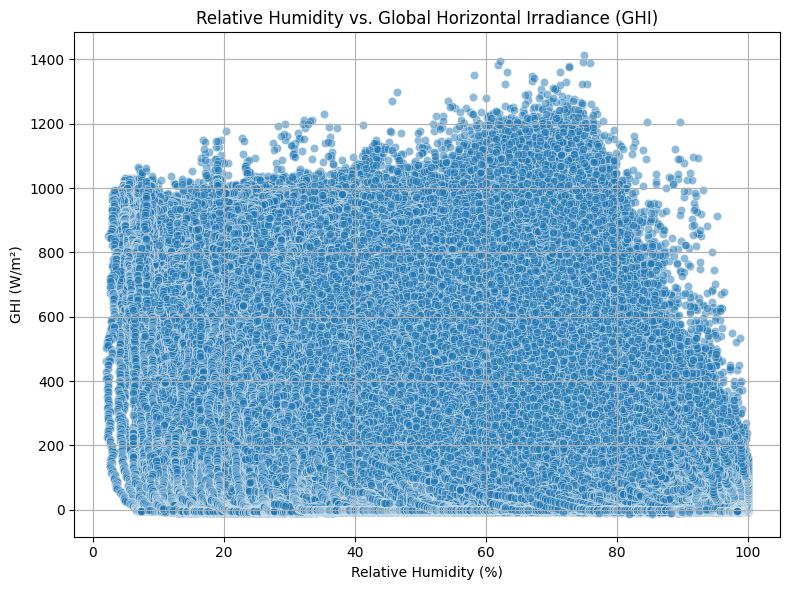

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title('Relative Humidity vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Bubble Plot: GHI vs Ambient Temperature (Bubble size = Relative Humidity)

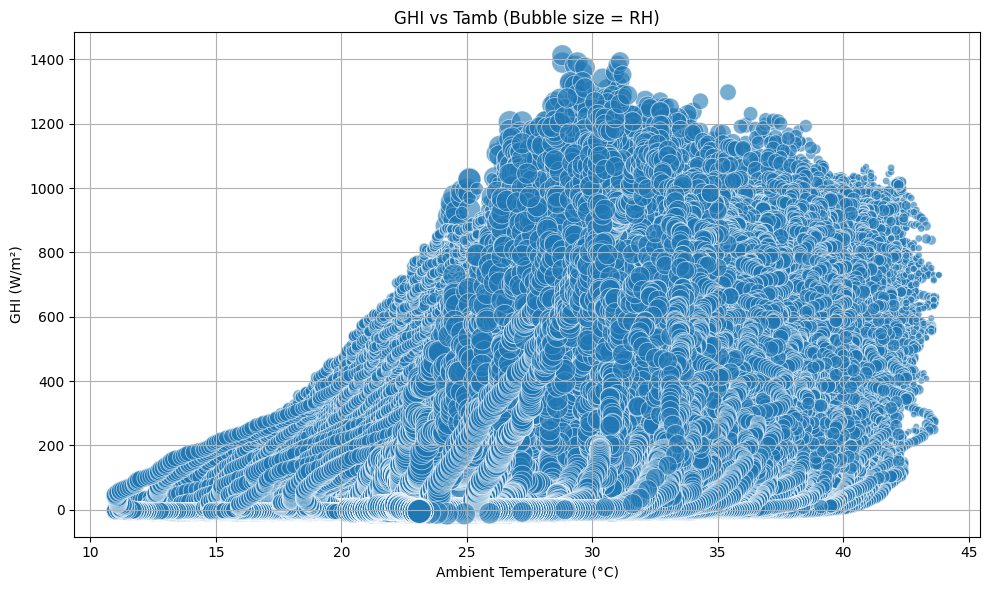

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Tamb', y='GHI', size='RH', alpha=0.6, sizes=(10, 300), legend=False)
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()
